## Week 15: Lecture 1

We want to continue the study of confidence intervals for regression. We will use confidence intervals to test hypotheses about the slope and intercept.  

Following an exploration of confidence intervals, we want to think about prediction of qualitative variables instead of quantitative variables. We will learn to use explanatory variables to classify records into two categories. 

In [2]:
# importing some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# changing some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Confidence Intervals) 

Remember that we use confidence intervals to quantify uncertainty about estimates. We learned that confidence intervals help us in hypothesis tests. Here we
1. Formulate a null hypothesis and alternative hypothesis 
3. Choose a test statistic. Compute the test statistic on the sample.
4. Generate a resample. Compute the test statistic on the resample. Repeat for many replications. 
5. Use percentiles to determine a confidence interval from the test statistics on the resamples.
6. If the test statistic on the sample does not lie in the confidence interval then we reject the null hypothesis.

We can use confidence intervals to quantify uncertainty about regression. Let us study the dataset from Lab 9. 

In [3]:
faithful = pd.read_csv("faithful.csv")
faithful

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
267,4.117,81.0
268,2.150,46.0
269,4.417,90.0
270,1.817,46.0


Recall that Old Faithful is a geyser. The table contains two pieces of information about each eruption of the Old Faithful geyser in Yellowstone National Park:
1. The duration of the eruption measured in minutes.
2. The time between this eruption and the next eruption measured in minutes.

We call the time between eruptions the waiting time.

In [4]:
table = faithful 
explanatory_variable = "duration"
response_variable = "wait"

We can generate a scatter-plot of the data.

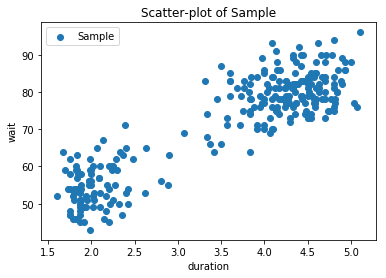

In [5]:
plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

plt.legend()
plt.xlabel("duration")
plt.ylabel("wait")
plt.title("Scatter-plot of Sample");

Using the function from Week 14 Lecture 2, we can determine the different components of regression.

In [6]:
r = correlation(table, explanatory_variable, response_variable)
r

0.9008111683218134

The correlation comes from converting to standard units. We can use the correlation to fit a line to the data in standard units. Unpacking the expression, we obtain the slope and intercept of the least squares regression line.

In [7]:
observed_slope = slope(table, explanatory_variable, response_variable)
observed_slope

10.729641395133529

In [8]:
observed_intercept = intercept(table, explanatory_variable, response_variable)
observed_intercept

33.474397022753344

We can add the line with the predictions to the scatter-plot.

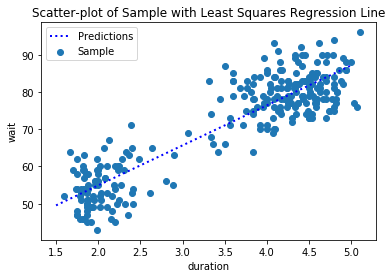

In [9]:
plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

xvalues = np.linspace(1.5, 5, 50)
plt.plot(xvalues, observed_intercept + observed_slope * xvalues, "b:", lw =2, label = "Predictions")

plt.legend()
plt.xlabel("duration")
plt.ylabel("wait")
plt.title("Scatter-plot of Sample with Least Squares Regression Line");

Remember that we have a sample containing 272 records. If we took another sample of the Old Faithful geyser, then we might obtain different waiting times and durations of eruptions. 

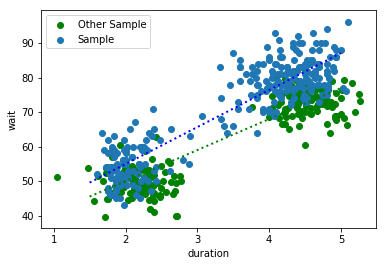

In [10]:
coordinates = generate_other_sample()
    
plt.scatter(coordinates[0,:,0], coordinates[1,:,0], c = "g", label = "Other Sample")
plt.scatter(coordinates[0,:,1], coordinates[1,:,1], c = "g")

plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

xvalues = np.linspace(1.5, 5, 50)
plt.plot(xvalues, observed_intercept + observed_slope * xvalues, "b:", lw =2)

other_intercept = 32
other_slope = 9
plt.plot(xvalues, other_intercept + other_slope * xvalues, "g:", lw =2)

plt.legend()
plt.xlabel("duration")
plt.ylabel("wait");

We have plotted the sample in blue. We have plotted another sample in green. From the samples we obtain two different lines for least squares regression. The green line fits the green points and the blue line fits the blue points.

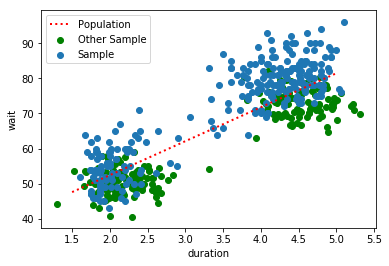

In [11]:
coordinates = generate_other_sample()
    
plt.scatter(coordinates[0,:,0], coordinates[1,:,0], c = "g", label = "Other Sample")
plt.scatter(coordinates[0,:,1], coordinates[1,:,1], c = "g")

plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

xvalues = np.linspace(1.5, 5, 50)
population_a = 33
population_b = 9.7
plt.plot(xvalues, population_a + population_b * xvalues, "r:", lw =2, label="Population")

plt.legend()
plt.xlabel("duration")
plt.ylabel("wait");

Maybe the blue line and green line differ from the slope and intercept that relates the explanatory variable to the response variable in the population. We can imagine that the red line captures the true relationship between waiting time and duration of eruptions for Old Faithful geyser. The samples could deviate from the red line for different reasons like errors in measurement. So with variation about the red line, we obtain the blue sample or green sample leading to different slope and intercept.  

In [12]:
replications = 1000
resample_size = len(table)

estimates_intercepts = []
estimates_slopes = []
for replication in range(replications):
    resample = sample_with_replacement(resample_size, table)
    
    slope_value = slope(resample, explanatory_variable, response_variable)
    intercept_value = intercept(resample, explanatory_variable, response_variable)
    
    estimates_intercepts.append(intercept_value)
    estimates_slopes.append(slope_value)

We need to get a handle on the uncertainty in the estimate of slope and intercept. Remember that we want to estimate unknown quantities about the population with known quantities about the sample. If we resample from the sample, then we can get some idea for the variability in the estimates. Here we use the bootstrap approach where we sample with replacement 272 times from the sample. For each resample, we calculate the slope and intercept. 

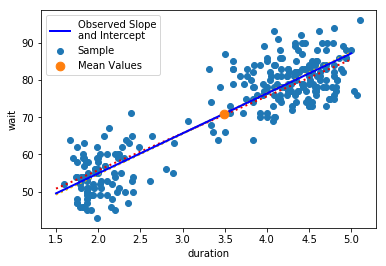

In [13]:
plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

xvalues = np.linspace(1.5, 5, 50)
number = 3
for idx, slope_value, intercept_value in zip(range(number), estimates_slopes[:number], estimates_intercepts[:number]):
    plt.plot(xvalues, intercept_value + slope_value * xvalues, color = cm.hot(idx/number), linestyle = "dotted", lw =2)

plt.plot(xvalues, observed_intercept + observed_slope * xvalues, "b", lw =2, label ="Observed Slope\nand Intercept")    

meanx = np.mean(table[explanatory_variable])
meany = np.mean(table[response_variable])
plt.scatter(meanx, meany, zorder = 20, s = 75, label = "Mean Values")

plt.legend()
plt.xlabel("duration")
plt.ylabel("wait");

We had 1000 replications. So we generated 1000 slopes and 1000 intercepts. Here we can plot three of the slopes and intercepts with lines determined from the resamples. Note that the lines fit to the resamples differ slightly from lines fit to the samples. 

The orange dot has horizontal coordinate the mean of `duration` and vertical coordinate the mean of `wait`. Moving away from the point, we find differences in the predictions. Usually the prediction across the lines fit to the resample are similar near the mean and dissimilar away from the mean.

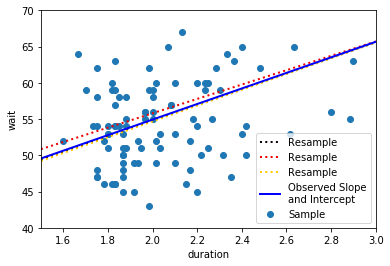

In [14]:
plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")

xvalues = np.linspace(1.5, 5, 50)
number = 3
for idx, slope_value, intercept_value in zip(range(number), estimates_slopes[:number], estimates_intercepts[:number]):
    plt.plot(xvalues, intercept_value + slope_value * xvalues, color = cm.hot(idx/number), linestyle = "dotted", lw =2, label="Resample")

plt.plot(xvalues, observed_intercept + observed_slope * xvalues, "b", lw =2, label ="Observed Slope\nand Intercept")    

plt.legend()
plt.xlim([1.5,3])
plt.ylim([40,70])
plt.xlabel("duration")
plt.ylabel("wait");

Focusing on duration of eruption between 1.5 minutes and 3 minutes, we observe the differences between the lines. Suppose that we fix a duration of eruption like 2 minutes. We have 1000 predictions from the slopes and intercepts across the replications. We can determine a 90% confidence interval to show the variation in waiting times. 

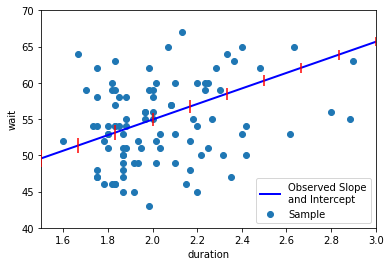

In [15]:
plt.scatter(table[explanatory_variable], table[response_variable], label = "Sample")
plt.plot(xvalues, observed_intercept + observed_slope * xvalues, "b", lw =2, label ="Observed Slope\nand Intercept")    

for value in np.linspace(1.5,3,10):
    predictions = [intercept + slope * value for (intercept, slope) in zip(estimates_intercepts, estimates_slopes)]
    percentile_5 = calculate_percentile(predictions, 5)
    percentile_95 = calculate_percentile(predictions, 95)
    plt.vlines(x = value, ymin = percentile_5, ymax = percentile_95, color = "red", zorder = 20)
    
plt.legend()
plt.xlim([1.5,3])
plt.ylim([40,70])
plt.xlabel("duration")
plt.ylabel("wait");

Note that the confidence intervals are wider for duration of eruption farther from the mean of 3.5 minutes. However the confidenc intevals are not wider than three minutes. So the slopes in the resamples appear close to the observed slope in the sample of 10.7 and the intercepts in the resamples appear close to the observed intercept in the sample of 33.4. 
 
 
However samples might not be representative of the population leading to resamples that might not representative of the population. So we should use hypothesis testing to evaluate the relationship between duration and wait time. If we have no relationship between them, then we would expect a correlation of 0 meaning a slope of 0.


- **Null Hypothesis Slope:** The true slope of the regression line that predicts wait from duration, computed using the population of all eruptions that have ever happened, is 0. If the slope of the regression line computed from our sample isn't 0, that's just the result of chance variation.
- **Alternate Hypothesis Slope:** The true slope of the regression line is not 0.

If the slope equals zero, then the prediction would just be the mean of the response variable. S

- **Null Hypothesis Intercept:** The true intercept of the regression line that predicts wait from duration, computed using the population of all eruptions that have ever happened, is mean wait of 70.8 minutes. If the intercept of the regression line computed from our sample isn't 70.8, that's just the result of chance variation.
- **Alternate Hypothesis Intercept:** The true intercept of the regression line is not 70.8.

We can compare the hypotheses to the data.

In [16]:
null_hypothesis_slope = 0 
null_hypothesis_intercept = np.mean(table[response_variable]) 

We compute the 5th percentile and 95th percentile to form a 90% confidence interval.

In [17]:
slope_percentile_5 = calculate_percentile(estimates_slopes, 5)
slope_percentile_95 = calculate_percentile(estimates_slopes, 95)

intercept_percentile_5 = calculate_percentile(estimates_intercepts, 5)
intercept_percentile_95 = calculate_percentile(estimates_intercepts, 95)

Histograms help us to visualize the confidence interval.

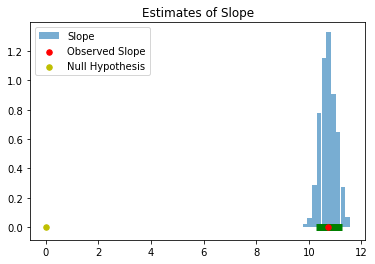

In [18]:
plt.hist(estimates_slopes, density = True, alpha = 0.6, rwidth=0.95, label = "Slope")
plt.hlines(y = 0, xmin = slope_percentile_5, xmax = slope_percentile_95, lw = 7, color = "green", zorder = 10)

plt.scatter(observed_slope, 0, s = 30, c = "r", zorder = 20, label = "Observed Slope")

plt.scatter(null_hypothesis_slope, 0, s = 30, c = "y", zorder = 20, label = "Null Hypothesis")

plt.legend()
plt.title('Estimates of Slope');

In [19]:
print("The p-value of the observed slope is {}".format(calculate_pvalue(observed_slope, estimates_slopes)))
print("The p-value of the null hypothesis slope is {}".format(calculate_pvalue(null_hypothesis_slope, estimates_slopes)))

The p-value of the observed slope is 0.496
The p-value of the null hypothesis slope is 0.0


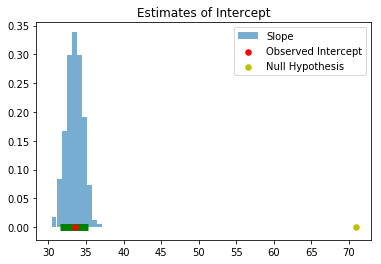

In [20]:
plt.hist(estimates_intercepts, density = True, alpha = 0.6, rwidth=0.95, label = "Slope")
plt.hlines(y = 0, xmin = intercept_percentile_5, xmax = intercept_percentile_95, lw = 7, color = "green", zorder = 10)

plt.scatter(observed_intercept, 0, s = 30, c = "r", zorder = 20, label = "Observed Intercept")

plt.scatter(null_hypothesis_intercept, 0, s = 30, c = "y", zorder = 20, label = "Null Hypothesis")

plt.legend()
plt.title('Estimates of Intercept');

In [21]:
print("The p-value of the observed intercept is {}".format(calculate_pvalue(observed_intercept, estimates_intercepts)))
print("The p-value of the null hypothesis interecept is {}".format(1 - calculate_pvalue(null_hypothesis_intercept, estimates_intercepts)))

The p-value of the observed intercept is 0.502
The p-value of the null hypothesis interecept is 0.0


So we should fail to reject the null hypothesis for both the slope and intercept. 

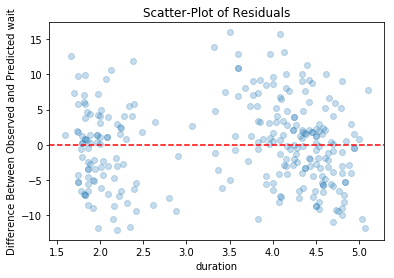

In [22]:
observed = table[response_variable]
predicted = fitted_values(table, explanatory_variable, response_variable)
residual = observed - predicted 

plt.scatter(table[explanatory_variable], residual, alpha = 0.25)

plt.axhline(y=0, color = "red", linestyle ="dashed")

plt.xlabel("duration")
plt.ylabel("Difference Between Observed and Predicted wait")
plt.title("Scatter-Plot of Residuals");

We can compare the scatter-plot of residuals. Above we have the residuals for predictions of wait from duration. Below we have the residuals for the prediction of wait from the mean value of 70.8 minutes.

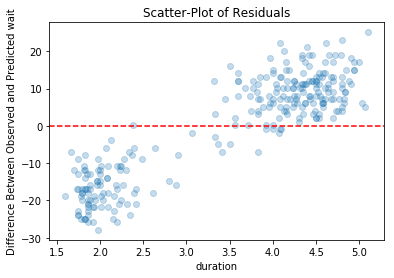

In [23]:
observed = table[response_variable]
predicted = np.mean(table[response_variable])
residual = observed - predicted 

plt.scatter(table[explanatory_variable], residual, alpha = 0.25)

plt.axhline(y=0, color = "red", linestyle ="dashed")

plt.xlabel("duration")
plt.ylabel("Difference Between Observed and Predicted wait")
plt.title("Scatter-Plot of Residuals");

The correlation of 0.9 reflects the difference.

### Example (Classification)

Suppose we want to use regression for qualitative variables. 

In [24]:
patients = pd.read_csv("breast-cancer.csv")
patients

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,...,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,...,3,1,1,0
1,1002945,5,4,4,...,3,2,1,0
2,1015425,3,1,1,...,3,1,1,0
3,1016277,6,8,8,...,3,7,1,0
4,1017023,4,1,1,...,3,1,1,0
...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,...,1,1,1,0
679,841769,2,1,1,...,1,1,1,0
680,888820,5,10,10,...,8,10,2,1
681,897471,4,8,6,...,10,6,1,1


Here we have a dataset with information about patient screenings for breast cancer. The response variable is `Class`. While the categories are encoded with 0 and 1, we should think of 0 and 1 as labels for benign and malignant. 

In [25]:
patients = patients[["Single Epithelial Cell Size", "Class"]].copy()
patients

,Single Epithelial Cell Size,Class
0,2,0
1,7,0
2,2,0
3,3,0
4,2,0
...,...,...
678,3,0
679,2,0
680,7,1
681,3,1


Instead of 0 and 1, we can encode the categories with colors.

In [26]:
colors = []
for number in patients["Class"]:
    if number == 1:
        colors.append("red")
    else:
        colors.append("blue")
    
patients["Class Color"] = colors
patients

,Single Epithelial Cell Size,Class,Class Color
0,2,0,blue
1,7,0,blue
2,2,0,blue
3,3,0,blue
4,2,0,blue
...,...,...,...
678,3,0,blue
679,2,0,blue
680,7,1,red
681,3,1,red


Now we can generate a scatter-plot to show the distribution of the reponse variable.

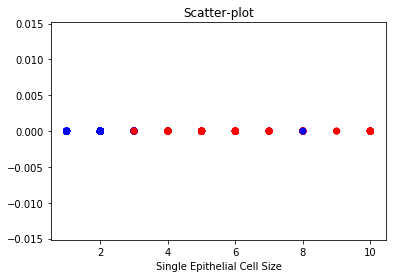

In [27]:
number_of_records = len(patients)

plt.scatter(patients["Single Epithelial Cell Size"], 
            np.zeros(number_of_records) ,
            c = patients["Class Color"])

plt.xlabel("Single Epithelial Cell Size")
plt.title("Scatter-plot");

We can generate a scatter-plot of the explanatory variable `Single Epithelial Cell`. Here yellow encodes the value 1 and 

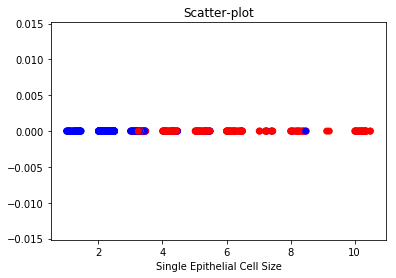

In [28]:
number_of_records = len(patients)
plt.scatter(patients["Single Epithelial Cell Size"] + 0.5 * np.random.rand(number_of_records), 
            np.zeros(len(patients)), 
            c = patients["Class Color"])

plt.xlabel("Single Epithelial Cell Size")
plt.title("Scatter-plot");

Since we have over-plotting we can jitter the points along the horizontal component. 

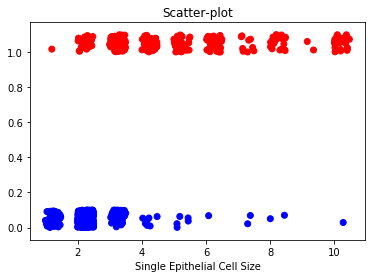

In [29]:
number_of_records = len(patients)
plt.scatter(patients["Single Epithelial Cell Size"] + 0.5 * np.random.rand(number_of_records), 
            patients["Class"] + 0.1 * np.random.rand(number_of_records), 
            c = patients["Class Color"])

plt.xlabel("Single Epithelial Cell Size")
plt.title("Scatter-plot");

Since we have trouble visualizing the data on one axis, we should use two axes. 

In [29]:
table = patients 
explanatory_variable = "Single Epithelial Cell Size"
response_variable = "Class"
observed_slope = slope(table, explanatory_variable, response_variable)
observed_intercept = intercept(table, explanatory_variable, response_variable)

We could try to use least squares regression to fit a line to the data. 

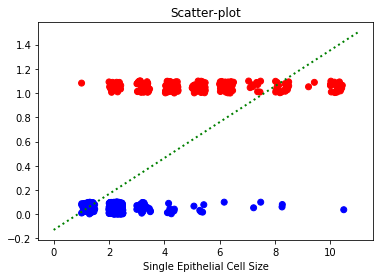

In [30]:
number_of_records = len(patients)
plt.scatter(patients["Single Epithelial Cell Size"] + 0.5 * np.random.rand(number_of_records), 
            patients["Class"] + 0.1 * np.random.rand(number_of_records), 
            c = patients["Class Color"])

xvalue = np.linspace(0,11,50)
plt.plot(xvalue, observed_intercept + observed_slope * xvalue, "g:", lw = 2)

plt.xlabel("Single Epithelial Cell Size")
plt.title("Scatter-plot");

However, we seem to miss the pattern in the data. The line cannot bend between 0 and 1.

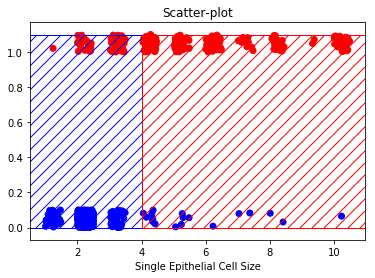

In [31]:
number_of_records = len(patients)
plt.scatter(patients["Single Epithelial Cell Size"] + 0.5 * np.random.rand(number_of_records), 
            patients["Class"] + 0.1 * np.random.rand(number_of_records), 
            c = patients["Class Color"])

add_patch(plt.gca(), [[0,0],[4,0],[4,1.1],[0,1.1]], color = "blue")
add_patch(plt.gca(), [[4,0],[11,0],[11,1.1],[4,1.1]], color = "red")


plt.xlabel("Single Epithelial Cell Size")
plt.title("Scatter-plot");

Really we want to divide the points into two regions separated by a threshold. If we take the threshold to be 4, then we would classify point like 8 as red and points like 2 as blue.

#### Nearest Neighbors

In [39]:
patients_with_neighbors = patients.copy()
patients_with_neighbors

,Single Epithelial Cell Size,Class,Class Color
0,2,0,blue
1,7,0,blue
2,2,0,blue
3,3,0,blue
4,2,0,blue
...,...,...,...
678,3,0,blue
679,2,0,blue
680,7,1,red
681,3,1,red


In [40]:
point_to_classify = 7.5

In [41]:
patients_with_neighbors["Distance"] = abs(patients_with_neighbors["Single Epithelial Cell Size"] - point_to_classify)
patients_with_neighbors

,Single Epithelial Cell Size,Class,Class Color,Distance
0,2,0,blue,5.5
1,7,0,blue,0.5
2,2,0,blue,5.5
3,3,0,blue,4.5
4,2,0,blue,5.5
...,...,...,...,...
678,3,0,blue,4.5
679,2,0,blue,5.5
680,7,1,red,0.5
681,3,1,red,4.5


In [42]:
patients_with_neighbors = patients_with_neighbors.sort_values("Distance", ascending=True)
patients_with_neighbors

,Single Epithelial Cell Size,Class,Class Color,Distance
40,8,1,red,0.5
171,8,1,red,0.5
65,8,1,red,0.5
276,8,1,red,0.5
207,7,1,red,0.5
...,...,...,...,...
36,1,0,blue,6.5
146,1,0,blue,6.5
455,1,0,blue,6.5
379,1,0,blue,6.5


In [43]:
number_of_neighbors = 11   # 101

smallest_distances = patients_with_neighbors[:number_of_neighbors]
smallest_distances

,Single Epithelial Cell Size,Class,Class Color,Distance
40,8,1,red,0.5
171,8,1,red,0.5
65,8,1,red,0.5
276,8,1,red,0.5
207,7,1,red,0.5
31,8,1,red,0.5
555,8,1,red,0.5
620,7,1,red,0.5
200,7,1,red,0.5
397,8,1,red,0.5


In [44]:
number_in_class_1 = np.sum(smallest_distances["Class"])
number_in_class_0 = number_of_neighbors - number_in_class_1

print("Fraction of Neighbors in Class 1 : {:0.1f}".format(number_in_class_1 / number_of_neighbors))
print("Fraction of Neighbors in Class 0 : {:0.1f}".format(number_in_class_0 / number_of_neighbors))

Fraction of Neighbors in Class 1 : 1.0
Fraction of Neighbors in Class 0 : 0.0


#### Classifications 

In [56]:
def proportion_among_neighbors(original_data, point_to_classify, number_of_neighbors):
    data = original_data.copy()
    
    data["Distance"] = abs(data["Single Epithelial Cell Size"] - point_to_classify)
    
    data = data.sort_values("Distance", ascending=True)

    smallest_distances = data[:number_of_neighbors]

    number_in_class_1 = np.sum(smallest_distances["Class"])
    number_in_class_0 = number_of_neighbors - number_in_class_1

    return number_in_class_0 / number_of_neighbors, number_in_class_1 / number_of_neighbors

In [57]:
original_data = patients
point_to_classify = 7.5
number_of_neighbors = 101

fraction_blue, fraction_red = proportion_among_neighbors(original_data, point_to_classify, number_of_neighbors)     
        
print("Fraction of Neighbors in Class 1 : {}".format(fraction_red))
print("Fraction of Neighbors in Class 0 : {}".format(fraction_blue))

Fraction of Neighbors in Class 1 : 0.91
Fraction of Neighbors in Class 0 : 0.09


In [58]:
def classify_point(original_data, point_to_classify, number_of_neighbors):
    fraction_blue, fraction_red = proportion_among_neighbors(original_data, point_to_classify, number_of_neighbors)     
    
    if fraction_blue >= fraction_red:
        category = 0
    else:
        category = 1
        
    return category

In [59]:
original_data = patients
point_to_classify = 7.5
number_of_neighbors = 101

predicted_category = classify_point(original_data, point_to_classify, number_of_neighbors)

print("Predicted Category {} for Singe Epithelial Cell Size {}".format(predicted_category, point_to_classify))

Predicted Category 1 for Singe Epithelial Cell Size 7.5
